In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

##Data Loading

In [2]:
#Loading data
path = '/content/4A_cleaned_6.xlsx'
data =pd.read_excel(path)
data.head(2)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,5,CENTRAL,"ISS,,",1
1,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,2,December,Monday,2010,3,CENTRAL,"ISS Stage I&II,,",1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   UNIT                                    4005 non-null   object
 1   IP NUMBER                               4005 non-null   object
 2   SEX                                     4005 non-null   object
 3   AGE                                     4005 non-null   int64 
 4   RELIGION                                4005 non-null   object
 5   DISTRICT OF RESIDENCE                   4005 non-null   object
 6   WORKING DIAGNOSIS                       4005 non-null   object
 7   OUT COME                                4005 non-null   object
 8   NUMBER OF PREVIOUS ADMISSIONS           4005 non-null   int64 
 9   TB_type                                 4005 non-null   object
 10  MARITAL STATUS                          4002 non-null   object
 11  MONT

##**Data Preprocessing**

In [4]:
#Deleting features which are not going to be used
features_to_remove = ['IP NUMBER', 'UNIT', 'DISTRICT OF RESIDENCE','WORKING DIAGNOSIS' ,'ADDITIONAL WORKING DIAGNOSIS',
                'MARITAL STATUS']
data = data.drop(columns = features_to_remove)

In [5]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [6]:
#Encoding categorical features
non_features = ['YEAR OF ADMISSION', 'DURATION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE','NUMBER OF PREVIOUS ADMISSIONS']
data1 = data.drop(columns=non_features)

text_columns = data1.select_dtypes(include=['object']).columns

data2 = pd.get_dummies(data, columns=text_columns)

In [7]:
data2['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 2,  4,  5,  1,  7,  6,  9, 20, 11, 13,  3,  8, 15, 14, 10, 18, 16,
       22, 21, 25, 12, 26, 23, 92,  0])

In [8]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].astype(float)
data2['AGE'] = data2['AGE'].astype(float)

In [9]:
data2.sample(4)

,AGE,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,...,DAY OF ADMISSION_Saturday,DAY OF ADMISSION_Sunday,DAY OF ADMISSION_Thursday,DAY OF ADMISSION_Tuesday,DAY OF ADMISSION_Wednesday,REGION_CENTRAL,REGION_EASTERN,REGION_NORTHERN,REGION_SOUTHERN,REGION_WESTERN
848,49.0,0,2012,7,2.0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2453,39.0,0,2016,3,2.0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1663,27.0,0,2014,5,2.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3124,48.0,0,2017,6,1.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 5 to 4001
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AGE                                     1280 non-null   float64
 1   NUMBER OF PREVIOUS ADMISSIONS           1280 non-null   int64  
 2   YEAR OF ADMISSION                       1280 non-null   int64  
 3   DURATION                                1280 non-null   int64  
 4   NUMBER OF ADDITIONAL WORKING DIAGNOSIS  1280 non-null   float64
 5   SEX_F                                   1280 non-null   uint8  
 6   SEX_M                                   1280 non-null   uint8  
 7   RELIGION_CATHOLIC                       1280 non-null   uint8  
 8   RELIGION_COU                            1280 non-null   uint8  
 9   RELIGION_ISLAM                          1280 non-null   uint8  
 10  RELIGION_OTHERS                         1280 non-null   uint

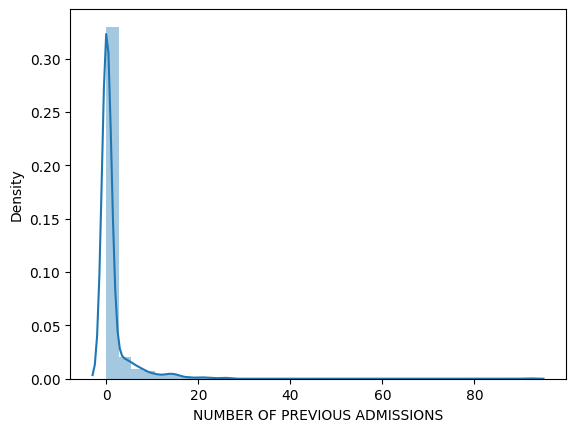

NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0.47439393814030534


<ipython-input-11-2ebe16f7c6fb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


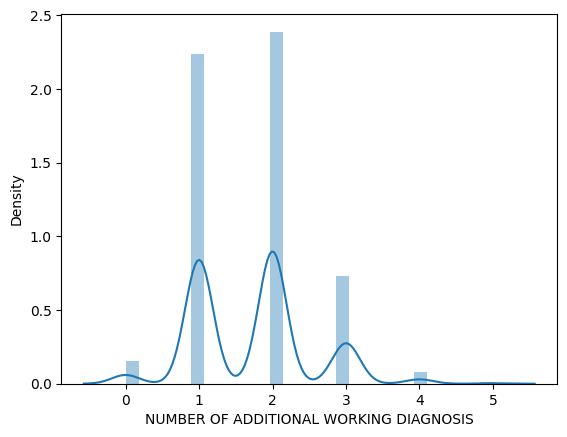

DURATION
1.4494220658069628


<ipython-input-11-2ebe16f7c6fb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


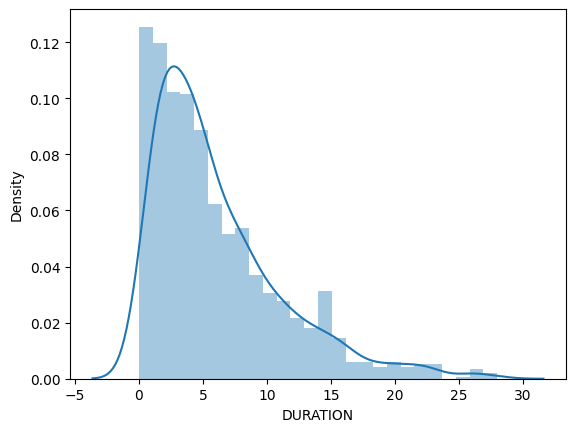

In [11]:
from scipy.stats import skew
import seaborn as sns

#Visualizing skeness of the continuous features
continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in continuous_features:
  print(col)
  print(skew(data2[col]))

  plt.figure()
  sns.distplot(data2[col])
  plt.show()

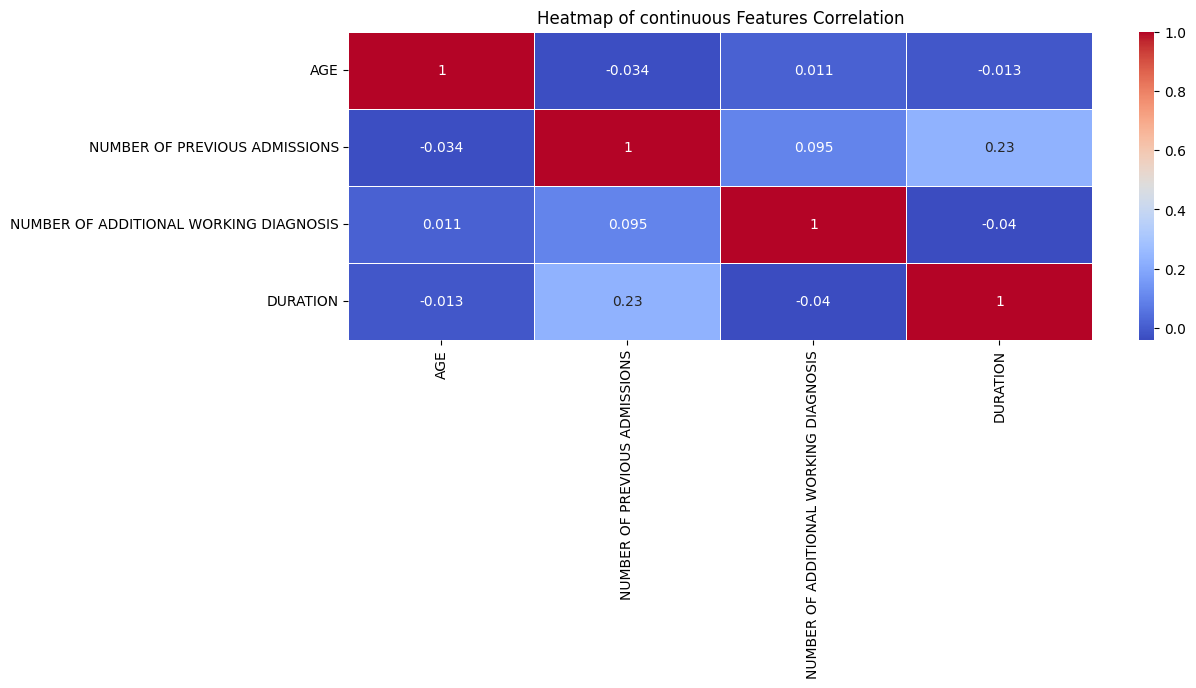

In [12]:
#Visualizing Correlation among the continuous features nluding the target
continuous_features_target = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
plt.figure(figsize=(12,4))
sns.heatmap(data2[continuous_features_target].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of continuous Features Correlation')
plt.show()

In [13]:
#Transforming the continuous features
transform_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in transform_features:
  data2[col] = np.log1p(data2[col])

#Second transformation
data2['NUMBER OF PREVIOUS ADMISSIONS'] = np.log1p(data2['NUMBER OF PREVIOUS ADMISSIONS'])



In [14]:
#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = MinMaxScaler()
data2[normalise_features] = scaler.fit_transform(data2[normalise_features])


<function matplotlib.pyplot.show(close=None, block=None)>

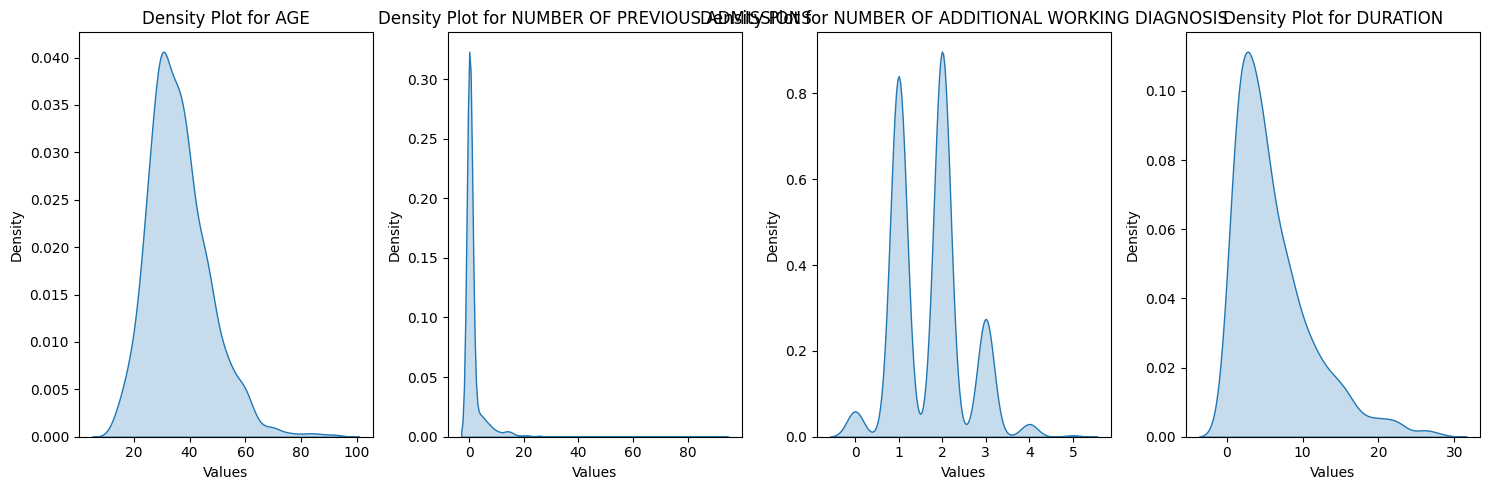

In [15]:
#Plotting Density plot
import seaborn as sns

continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']

fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))

for i, col in enumerate(continuous_features):
  sns.kdeplot(data[col], fill=True,ax=axes[i])
  axes[i].set_title(f'Density Plot for {col}')
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Density')
# plt.figure(figsize=(8,9))
# plt.bar(data['AGE'])
plt.tight_layout()
plt.show

In [16]:
data2.sample(2)

,AGE,NUMBER OF PREVIOUS ADMISSIONS,YEAR OF ADMISSION,DURATION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,...,DAY OF ADMISSION_Saturday,DAY OF ADMISSION_Sunday,DAY OF ADMISSION_Thursday,DAY OF ADMISSION_Tuesday,DAY OF ADMISSION_Wednesday,REGION_CENTRAL,REGION_EASTERN,REGION_NORTHERN,REGION_SOUTHERN,REGION_WESTERN
865,0.624704,0.000000,2013,2.079442,0.773706,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
186,0.237358,0.715021,2011,2.397895,0.773706,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [17]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([0.38685281, 0.61314719, 0.77370561, 1.        , 0.8982444 ,
       0.        ])

In [18]:
data2.shape

(1280, 43)

In [19]:
#Saving Preprocced data
data.to_excel('preprocessed1_TB-4a.xlsx', index=False)

##Data Splitting

In [20]:
data2['YEAR OF ADMISSION'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

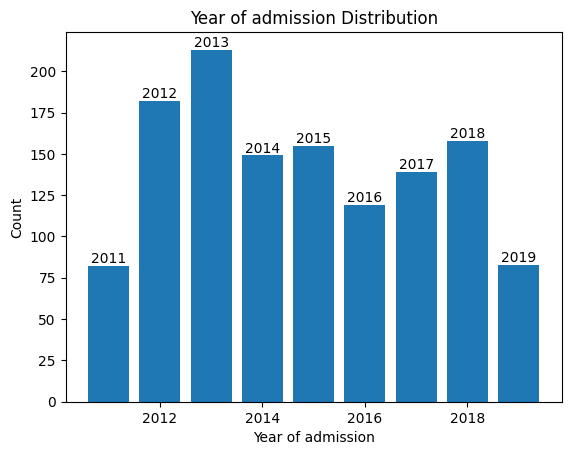

In [21]:
#counting occurence of each year
year_count = data2['YEAR OF ADMISSION'].value_counts().sort_index()

#Plotting the Chart
plt.bar(year_count.index, year_count.values)

#Labelling
plt.xlabel('Year of admission')
plt.ylabel('Count')
plt.title('Year of admission Distribution')

#Labelling the bins
for year, count in zip(year_count.index, year_count.values):
  plt.text(year, count, str(year), ha='center', va='bottom')

#Show the Plot
plt.show()

In [22]:
#Splitting dataset into training and testing set
train_df = data2[data['YEAR OF ADMISSION'] <= 2016]

test_df = data2[data['YEAR OF ADMISSION'] > 2016]
#extracting features and targets

non_train_feature = ['YEAR OF ADMISSION',	'DURATION']

X_train = train_df.drop(columns=non_train_feature)
y_train = train_df['DURATION']

X_test = test_df.drop(columns=non_train_feature)
y_test = test_df['DURATION']

#Splitting data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


#**MODEL TRAINING**

In [23]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)


##**Model1**

In [24]:
#neural network Architecture(ANN)
model1 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae'])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               21000     
                                                                 
 dense_1 (Dense)             (None, 15)                7515      
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 28736 (112.25 KB)
Trainable params: 28736 (112.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
#model1 training and validation
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)



Epoch 1/100
23/23 [==============================] - 2s 14ms/step - loss: 3.4515 - mse: 3.4515 - mae: 1.7149 - val_loss: 3.7348 - val_mse: 3.7348 - val_mae: 1.8134
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 3.3515 - mse: 3.3515 - mae: 1.6873 - val_loss: 3.6532 - val_mse: 3.6532 - val_mae: 1.7910
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 3.2755 - mse: 3.2755 - mae: 1.6659 - val_loss: 3.5728 - val_mse: 3.5728 - val_mae: 1.7687
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 3.2009 - mse: 3.2009 - mae: 1.6445 - val_loss: 3.4935 - val_mse: 3.4935 - val_mae: 1.7463
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 3.1279 - mse: 3.1279 - mae: 1.6232 - val_loss: 3.4156 - val_mse: 3.4156 - val_mae: 1.7241
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 3.0561 - mse: 3.0561 - mae: 1.6021 - val_loss: 3.3401 - val_mse: 3.3401 - val_mae: 1.7023
Epoch 7/100
23/23 [==

In [26]:
#Evaluating the model's performance
test_loss, test_mse, test_mae = model1.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')

12/12 [==============================] - 0s 6ms/step - loss: 0.5155 - mse: 0.5155 - mae: 0.5848
Test Loss: 0.5155056715011597
Test MSE: 0.5155056715011597
Test MAE: 0.5847861170768738


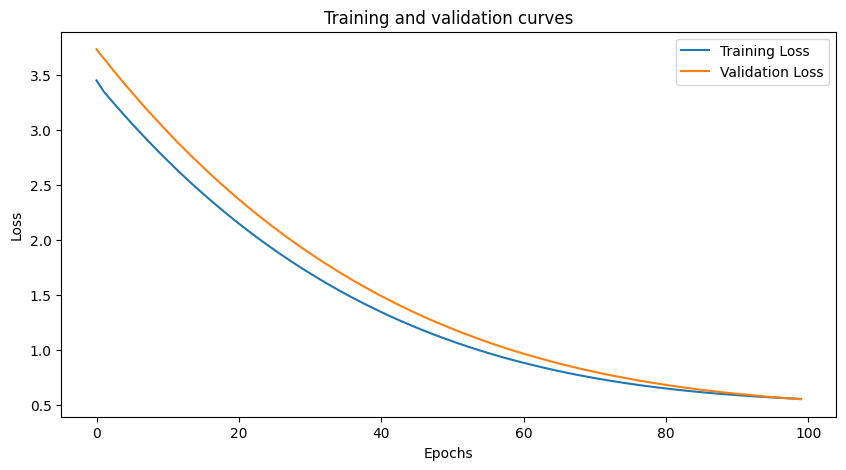

In [46]:
#extracting relevant informationfrom the training history
train_loss =history1.history['loss']
val_loss = history1.history['val_loss']

#Plotting Traing and validation cures
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation curves')
plt.show()

In [27]:
#making predictions
y_pred1 = model1.predict(X_test)

#Changing the shape of the results and getting the loss
y_pred1_= y_pred1.flatten()
residual1 = y_test - y_pred1_

12/12 [==============================] - 0s 2ms/step


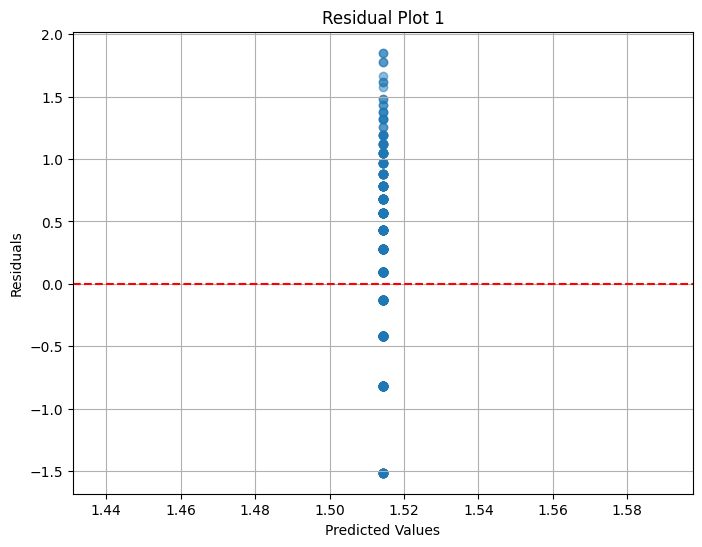

In [28]:
#Plotting the Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred1_, residual1,alpha=0.5)
plt.title('Residual Plot 1')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

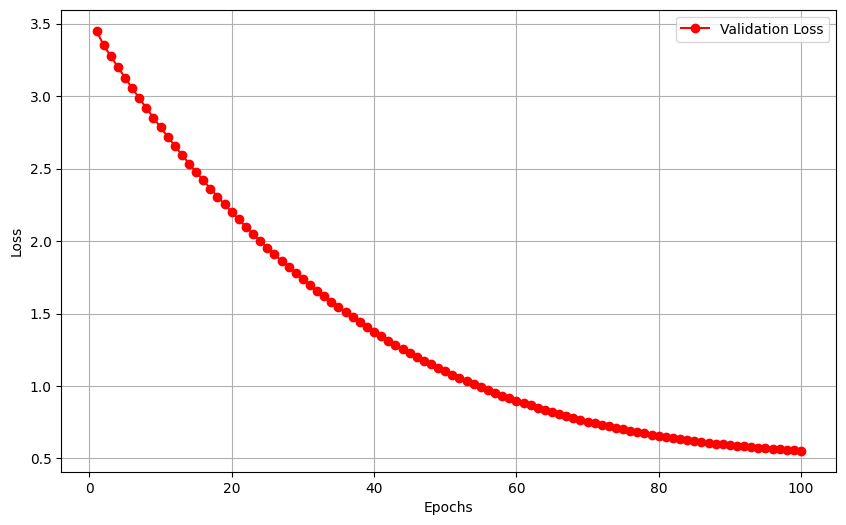

In [29]:
#plotting a learning curve
hist_dict = history1.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs,loss_values,'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

##**Model2**

In [30]:

#A more complex model architecture (ANN)
model2 = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(1, activation='linear')
])

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               21504     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [31]:
history2=model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)



Epoch 1/100
23/23 [==============================] - 3s 26ms/step - loss: 3.3554 - mae: 1.3926 - mse: 3.3554 - val_loss: 3.0401 - val_mae: 1.5985 - val_mse: 3.0401
Epoch 2/100
23/23 [==============================] - 0s 18ms/step - loss: 2.0853 - mae: 1.1341 - mse: 2.0853 - val_loss: 2.6488 - val_mae: 1.4802 - val_mse: 2.6488
Epoch 3/100
23/23 [==============================] - 0s 15ms/step - loss: 1.8278 - mae: 1.0616 - mse: 1.8278 - val_loss: 2.2415 - val_mae: 1.3366 - val_mse: 2.2415
Epoch 4/100
23/23 [==============================] - 0s 16ms/step - loss: 1.4060 - mae: 0.9481 - mse: 1.4060 - val_loss: 1.8260 - val_mae: 1.1770 - val_mse: 1.8260
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 1.2392 - mae: 0.8765 - mse: 1.2392 - val_loss: 1.4753 - val_mae: 1.0362 - val_mse: 1.4753
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 1.1761 - mae: 0.8682 - mse: 1.1761 - val_loss: 1.2614 - val_mae: 0.9431 - val_mse: 1.2614
Epoch 7/100
23/2

In [32]:
#Evaluating
test_loss, test_mae, test_mse = model2.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')

12/12 [==============================] - 0s 2ms/step - loss: 0.6042 - mae: 0.6341 - mse: 0.6042
Test Loss: 0.6042442917823792
Test MAE: 0.634082019329071
Test MSE: 0.6042442917823792


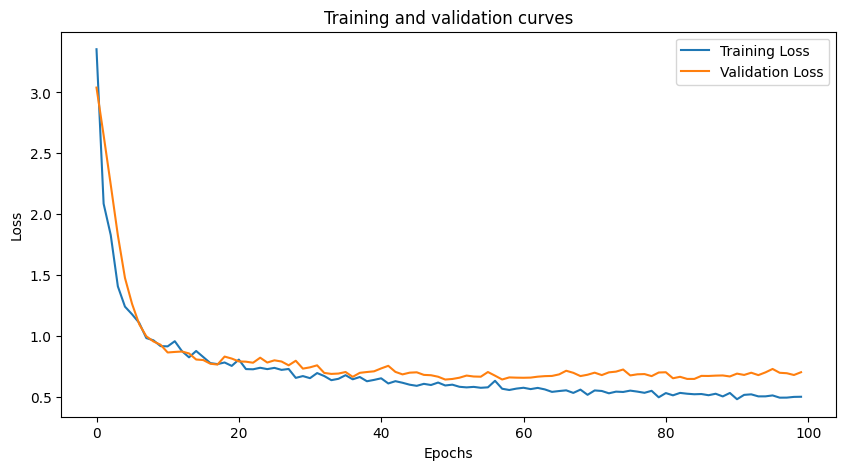

In [47]:
#extracting relevant informationfrom the training history
train_loss =history2.history['loss']
val_loss = history2.history['val_loss']

#Plotting Traing and validation cures
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation curves')
plt.show()

In [33]:
#making predictions
y_pred2 = model2.predict(X_test)
y_pred2_= y_pred2.flatten()
residual2 = y_test - y_pred2_

12/12 [==============================] - 0s 3ms/step


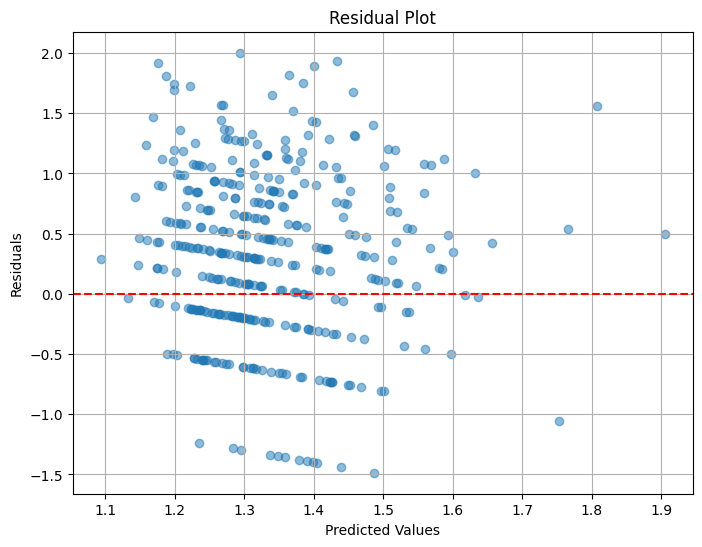

In [34]:
#Plotting the Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred2_, residual2,alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

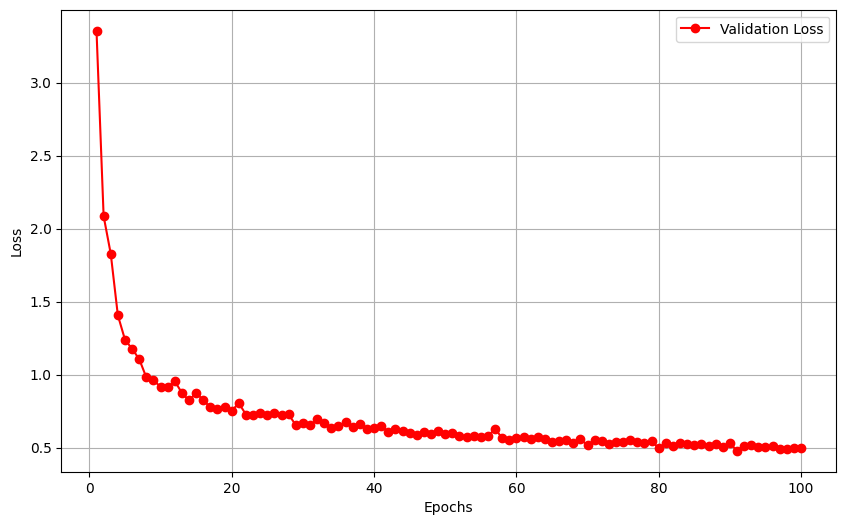

In [35]:
#plotting a learning curve
hist_dict = history2.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs,loss_values,'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

##**Model3**

In [36]:
#creating a neural network model for model3
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
hidden_layer1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
hidden_layer2 = tf.keras.layers.Dense(20, activation='relu')(hidden_layer1)
output_layer = tf.keras.layers.Dense(1, activation='linear',)(hidden_layer2)

model3 = tf.keras.Model(inputs=input_layer, outputs=output_layer)


In [58]:
#implementing Cross-validation
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

folds = 4
cross_val = KFold(n_splits=folds, shuffle=True, random_state=42)

i = 0

for train_index, test_index in cross_val.split(X_train, y_train):
  X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train_fold, y_test_fold = y_train.iloc[train_index],y_train.iloc[test_index]

 # optim = Adam(learning_rate=0.01)
  model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae'])

  history3 = model3.fit(X_train_fold, y_train_fold, epochs=50, batch_size=150, validation_data=(X_test_fold, y_test_fold))

  score = model3.evaluate(X_test, y_test)
  i+=1
  print("Validation Scorefor fold {}: {}".format(i, score))

Epoch 1/50
5/5 [==============================] - 1s 51ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0875 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0702
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0693 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0634
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0542 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0450
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0467 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0374
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0407 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0433
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0365 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0346
Epoch 7/50
5/5 [==================

In [59]:
test3_loss, test3_mse, test3_mae = model3.evaluate(X_test, y_test)

print(f'Test Loss: {test3_loss}')
print(f'Test MAE: {test3_mae}')
print(f'Test MSE: {test3_mse}')

12/12 [==============================] - 0s 2ms/step - loss: 1.3602 - mse: 1.3602 - mae: 0.9452
Test Loss: 1.3602015972137451
Test MAE: 0.9452422261238098
Test MSE: 1.3602015972137451


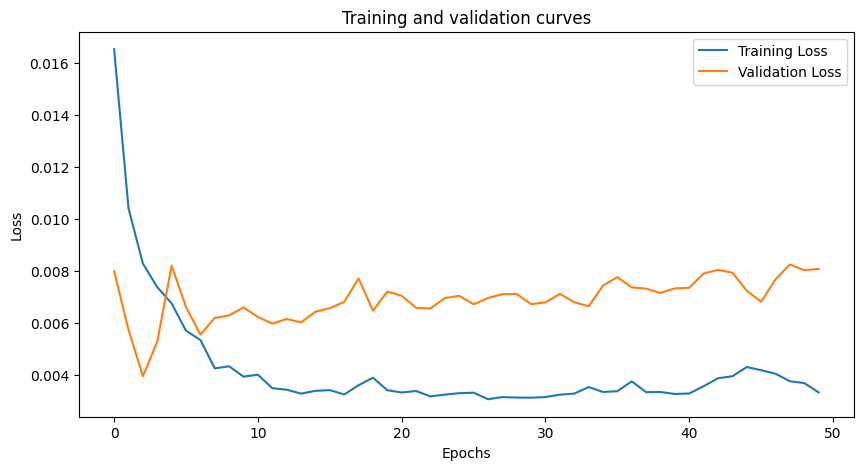

In [60]:
#extracting relevant informationfrom the training history
train_loss =history3.history['loss']
val_loss = history3.history['val_loss']

#Plotting Traing and validation cures
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation curves')
plt.show()

In [39]:
#making predictions
y_pred3 = model3.predict(X_test)
y_pred3_= y_pred3.flatten()
residual3 = y_test - y_pred3_

12/12 [==============================] - 0s 2ms/step


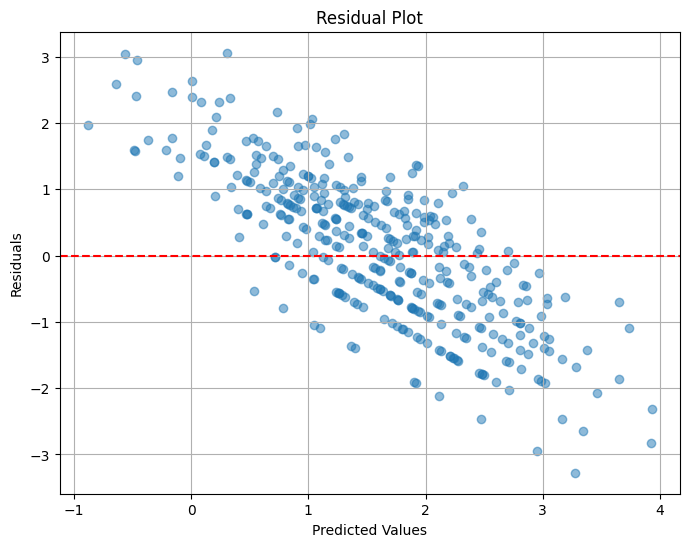

In [40]:
#Plotting the Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred3_, residual3,alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

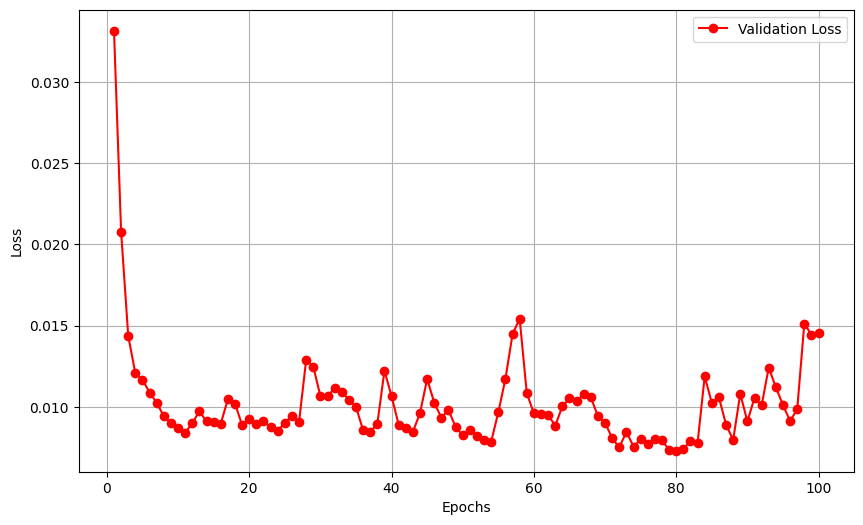

In [41]:
#plotting a learning curve
hist_dict = history3.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs,loss_values,'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()